# Lecture 1.1: Estimating $\pi$ using Monte Carlo Simulation

Monte Carlo simulations are a class of computational algorithms that rely on repeated random sampling to estimate the probability of certain outcomes. In the context of UQ, these simulations provide a practical method for propagating uncertainty through complex systems. 

We can consider each random sample in a Monte Carlo simulation as representing a possible realization of the uncertainties in our system. By running many such simulations, we can begin to understand how these uncertainties might affect our final results. 

Today, we'll be focusing on a relatively simple system: a square and an inscribed circle, which we'll use to estimate the value of $\pi$.

<img src="images/MC_pi.jpg" alt="circle monte carlo" width="18%"/>

### The Rationale Behind the Simulation

Having a square with side length $2$, the circle inscribed within it has a radius $r=1$ and an area of $\pi$. 
The area of this square is $4$, so the ratio of the area of the circle to the area of the square is $\pi/4$.
 
The radial coordinate $r$ is related to the Cartesian coordinates $x$ and $y$ by the equation
$$
    r^2 = x^2 + y^2.
$$

Having in mind this relationship we define the inequality 
$$
    x^2 + y^2 \leq 1
$$
as the condition for a point $(x,y)$ to be inside the circle.

So using a Monte Carlo simulation by randomly generating points within the square and counting the proportion that fall within the circle using the above inequality, we can approximate $\pi/4$, allowing us to estimate $\pi$.

## Importing the Necessary Libraries

For this code, we'll import only `random`, `math` and `matplotlib` to generate random numbers, perform mathematical operations, and plot our results, respectively.

In [1]:
import random
import math
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"

## The Simulation

In [14]:
num_points = 100_000  # Number of points to generate

points_inside_circle = 0 # Counter to hold how many points fall within the quarter circle

# Generate points and count how many fall within the quarter circle.
for _ in range(num_points):
    x = random.random()  # Random x coordinate
    y = random.random()  # Random y coordinate

    # If the point falls within the quarter circle, increment our counter.
    if math.sqrt(x**2 + y**2) <= 1.0:
        points_inside_circle += 1

pi_estimate = 4 * points_inside_circle / num_points
print(f"Estimated Pi: {pi_estimate}")

Estimated Pi: 3.13608


The estimate will vary due to the random nature of the Monte Carlo method. However, with a large number of points, it should be reasonably close to the true value of $\pi$ (about 3.14159).

### Visualizing the Results

Let's plot the Monte Carlo Pi estimation simulation by scattering the points within the square and coloring them red if they fall within the circle and blue if they fall outside the circle.

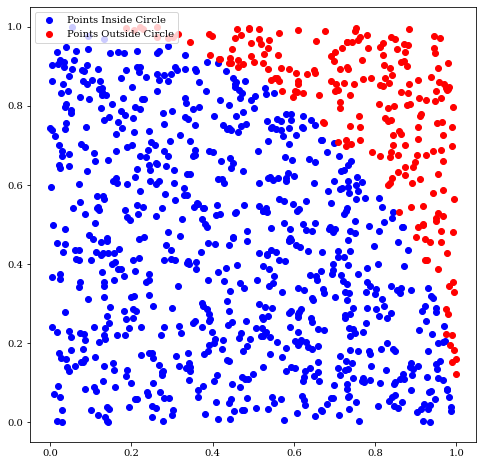

In [3]:
num_points = 1_000

points_inside_circle = [] # List to hold points that fall within the quarter circle
points_outside_circle = [] # List to hold points that fall outside the quarter circle

# Generate points and count how many fall within the quarter circle.
for _ in range(num_points):
    x = random.random()
    y = random.random()

    if math.sqrt(x**2 + y**2) <= 1.0:
        points_inside_circle.append((x, y))
    else:
        points_outside_circle.append((x, y))

# Separate the points' coordinates for plotting.
x_inside, y_inside = zip(*points_inside_circle)
x_outside, y_outside = zip(*points_outside_circle)

# Plot the points.
plt.figure(figsize=(8, 8))
plt.scatter(x_inside, y_inside, color='b', label='Points Inside Circle')
plt.scatter(x_outside, y_outside, color='r', label='Points Outside Circle')
plt.legend()
plt.show()

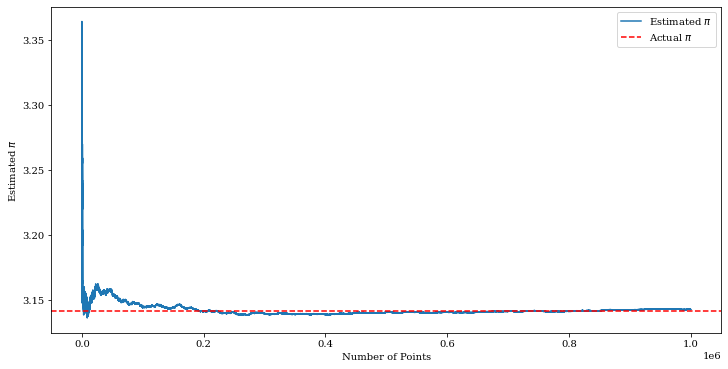

In [18]:
pi_estimations = []
points_inside_circle = 0
num_points = 100
for i in range(num_points):
    x = random.random()
    y = random.random()

    if math.sqrt(x**2 + y**2) <= 1.0:
        points_inside_circle += 1

pi_estimation = 4 * points_inside_circle / (num_points+1)
pi_estimations.append(pi_estimation)

while num_points < 1_000_000:
    x = random.random() 
    y = random.random() 

    if math.sqrt(x**2 + y**2) <= 1.0:
        points_inside_circle += 1

    pi_estimation = 4 * points_inside_circle / num_points

    pi_estimations.append(pi_estimation)
    num_points += 1

plt.figure(figsize=(12, 6))
plt.plot( [ i for i in range(99, 1_000_000) ], pi_estimations, label=r'Estimated $\pi$')
plt.axhline(y=math.pi, color='r', linestyle='--', label=r'Actual $\pi$')
plt.xlabel('Number of Points')
plt.ylabel(r'Estimated $\pi$')
plt.legend()
plt.show()

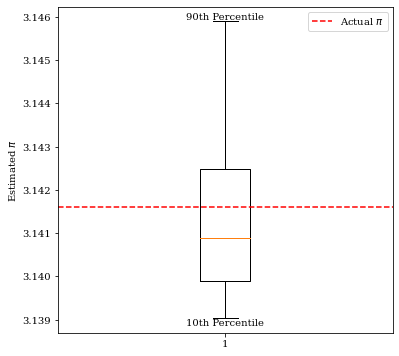

In [51]:
alpha = 0.1

pi_estimations.sort()
plt.figure(figsize=(6, 6))
plt.boxplot(pi_estimations, showfliers=False, whis=(int(100*alpha), int(100*(1-alpha))) )

plt.annotate( f"10th Percentile", (1, pi_estimations[int(len(pi_estimations)*alpha)] ), ha='center', va='top' )
plt.annotate( f"90th Percentile", (1, pi_estimations[int(len(pi_estimations)*(1-alpha) )] ), ha='center', va='bottom' )

plt.axhline(y=math.pi, color='r', linestyle='--', label=r'Actual $\pi$')
plt.ylabel(r'Estimated $\pi$')
plt.legend()
plt.show()

The Monte Carlo method of estimating $\pi$ is a basic illustration of how Monte Carlo simulations can be used to quantify and understand uncertainty. Though this method isn't practical for getting precise values of $\pi$ (there are formulas that can compute it to many thousands of decimal places), it clearly demonstrates the power of randomness and simulation in tackling deterministic problems.

It's essential to understand that in this simple scenario, we are embracing uncertainty by generating random points and observing the aggregate results. This same principle scales to much more complex models and systems, where uncertainties can come from a myriad of sources and can significantly affect our predictions and decision-making processes. This is the foundation of Uncertainty Quantification.

In the next lectures, we will delve deeper into UQ principles, exploring more sources of uncertainty, more sophisticated simulation methods, and how we can use these tools to make informed decisions under uncertainty.

___
### References

[1] Metropolis, N., & Ulam, S. (1949). The Monte Carlo method. Journal of the American statistical association, 44(247), 335-341. doi: 10.1080/01621459.1949.10483310

[2] S. Dasgupta, C. H. Papadimitriou, and U. V. Vazirani. Algorithms. McGraw-Hill Higher Education, 2008. ISBN 978-0-07-352340-8.

[3] G. B. de Miranda An Improved Approach for Uncertainty Quantification in Enhanced Oil Recovery. Undergraduate Thesis. Federal University of Juiz de Fora, Brazil, 2021. Available at: http://200.131.219.47/tcc-web/tcc?id=659